<a href="https://colab.research.google.com/github/zakkaizzatur/Data-Related-Projects/blob/main/Customer_Data_Segmentation_using_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Customer Data Segmentation using KMeans**

---

## Dataset
In this notebook, the data can be accessed from: [dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

This dataset contains 200 data of Customer ID, age, gender, annual income and spending score from a store. 

---
## Segmentation Process

The segmentation of the data is done to design a suitable marketing strategy for each kind of customer. Segmentation process is carried out using the KMeans method. 








###Importing dataset

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'zakkaizzatur'
os.environ['KAGGLE_KEY'] = 'ebfe0360db68f192c2b32c725f0c6b43'

In [2]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 1.39MB/s]


In [3]:
!unzip -q customer-segmentation-tutorial-in-python.zip -d .

In [4]:
link = '/content/Mall_Customers.csv'

###Importing suitable libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(link)

###Exploratory Data Analysis

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Figure size 1440x1440 with 0 Axes>

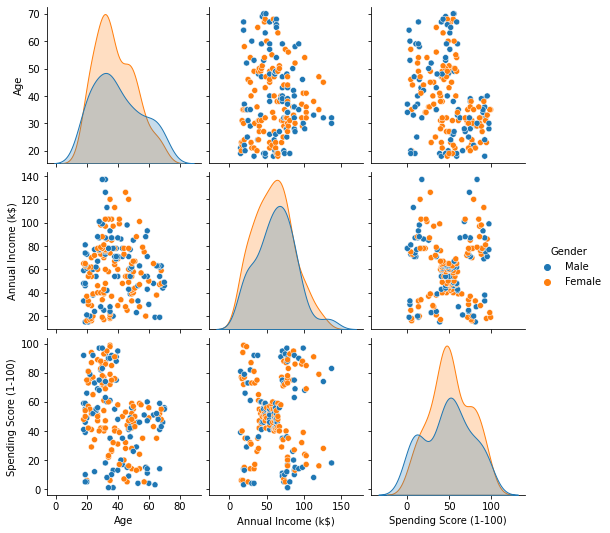

<Figure size 1440x1440 with 0 Axes>

In [12]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender')
plt.figure(figsize=(20,20))

As we can see from the plot below, the type of gender doesn't have significant effect on the spread of the data

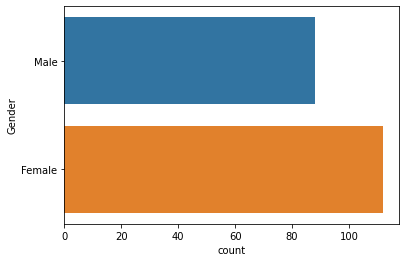

In [13]:
sns.countplot(data=df, y='Gender')

In [14]:
df2 = df.drop(['CustomerID', 'Gender'], axis=1) #drop CustomerID and Gender column

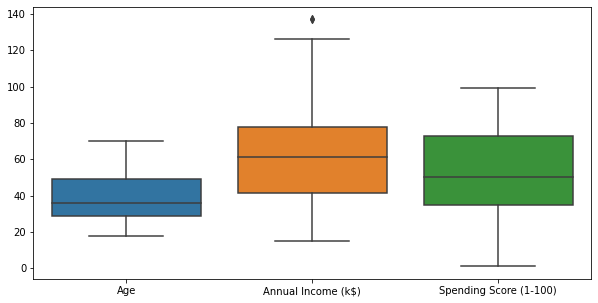

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(data=(df.drop('CustomerID', axis=1)))

Using boxplot, we can see the spread of the numerical data. From the Annual Income column, there are some outliers but that's okay and since the dataset consisted from small amount of data, I didn't delete the outlier.

###Segmentation Process using KMeans

In [16]:
df3 = df2.iloc[:, [1,2]].values #taking the 

In the first segmentation, I used Annual Income and Spending Score data

(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

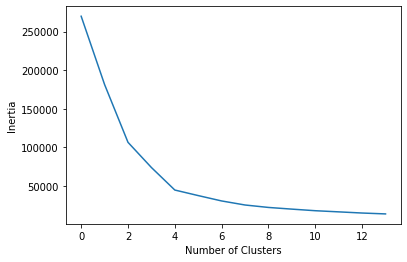

In [18]:
from sklearn.cluster import KMeans
wcss = [] #WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

for i in range(1,15):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(df3)
  wcss.append(kmeans.inertia_) #we can access inertia_ from the model to get the WCSS

plt.plot(wcss)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

By using the elbow method, I used the value of k=5 because the decrease in inertia at the next K is no longer significant

In [19]:
model = KMeans(n_clusters=5).fit(df3)

KMeans model using 5 clusters

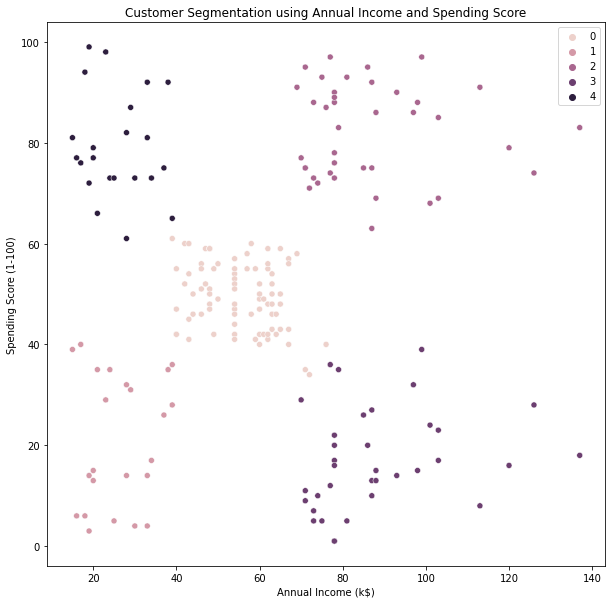

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df2["Annual Income (k$)"], y=df2["Spending Score (1-100)"], hue=model.labels_)
plt.title('Customer Segmentation using Annual Income and Spending Score')
plt.show()

From the scatterplot, we can see that there are five segment of customers based on their annual income and their spending score. The categories are:


1.   Low annual income and low spending score
2.   High annual income and low spending score
3.   Middle annual income and middle spending score
4.   Low annual income and high spending score
5.   High annual income and high spending score



In [25]:
df4 = df[["Age","Spending Score (1-100)"]].values

In the second segmentation, I used Age and Spending Score data

(Text(0.5, 0, 'Number of Clusters'), Text(0, 0.5, 'Inertia'))

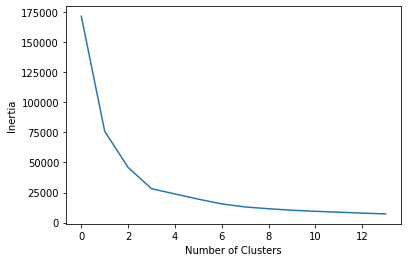

In [27]:
wcss2 = []
for i in range(1,15):
  model2 = KMeans(n_clusters=i, init='k-means++', random_state=0)
  model2.fit(df4)
  wcss2.append(model2.inertia_)

plt.plot(wcss2)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')

By using the elbow method, I used the value of k=6 because the decrease in inertia at the next K is no longer significant

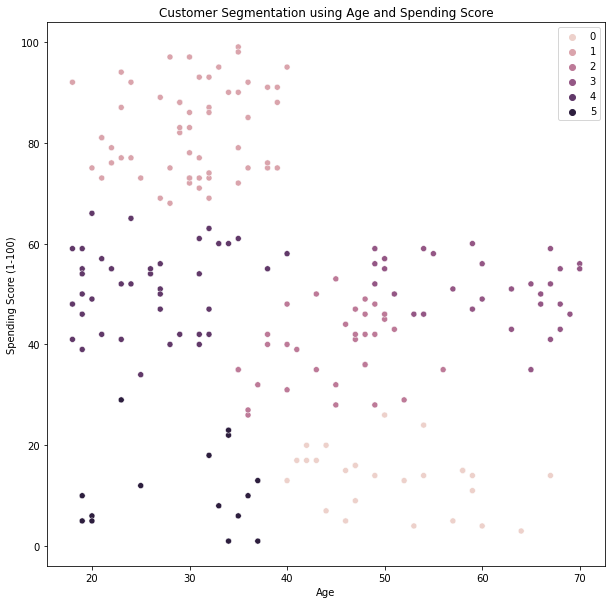

In [32]:
model2 = KMeans(n_clusters=6, init='k-means++', random_state=42)
model2.fit(df4)

plt.figure(figsize=(10,10))
sns.scatterplot(x=df["Age"], y=df2["Spending Score (1-100)"], hue=model2.labels_)
plt.title('Customer Segmentation using Age and Spending Score')
plt.show()

From the plot below, we can see that based on age and spending score of each customer, there are 6 categories of them. Something that caught my interest is there are no customer with age more than 40 with spending score more than 60.

It means that based on the spending score determination metrics, we can differentiate the marketing strategy for the customer with age more than 40 and less than 40. 

Then, based on that category, we can divide it again by using their spending score like this:


1.   First category : Low spending score (0-30)
2.   Second category : Medium spending score (30-60)
3.   Third category : High spending score (60-100)


In [34]:
import plotly.express as px

model3 = KMeans(n_clusters=5, init='k-means++', random_state=42)

X = df.iloc[:,2:5].values

model3.fit(X)

fig = px.scatter_3d(df, x="Annual Income (k$)", y="Spending Score (1-100)", z="Age",
                    color = model3.labels_, size = model3.labels_)
fig.show()

Then, if we want to see the 3d segmentation from the customers, we can use plotly express to plot the model. With this graph, we can see the segmentation based on age, spending score, and annual income. This segmentation might give us more insight from the data and more categories to be used for designing marketing strategy